In [2]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

import torch
import torch.nn.functional as F

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
f = open("./data/names.txt")
data = f.readlines()
data = [x.replace('\n','') for x in data]
f.close()
data[:5]

['emma', 'olivia', 'ava', 'isabella', 'sophia']

In [13]:
s = np.sort(list(set("".join(data))))
mapp_stoi = {s[i]:i+1 for i in range(len(s))}
mapp_stoi["."] = 0
mapp_itos = {v:k for k,v in mapp_stoi.items()}

In [14]:
mapp_stoi

{'a': 1,
 'b': 2,
 'c': 3,
 'd': 4,
 'e': 5,
 'f': 6,
 'g': 7,
 'h': 8,
 'i': 9,
 'j': 10,
 'k': 11,
 'l': 12,
 'm': 13,
 'n': 14,
 'o': 15,
 'p': 16,
 'q': 17,
 'r': 18,
 's': 19,
 't': 20,
 'u': 21,
 'v': 22,
 'w': 23,
 'x': 24,
 'y': 25,
 'z': 26,
 '.': 0}

In [15]:
mapp_itos

{1: 'a',
 2: 'b',
 3: 'c',
 4: 'd',
 5: 'e',
 6: 'f',
 7: 'g',
 8: 'h',
 9: 'i',
 10: 'j',
 11: 'k',
 12: 'l',
 13: 'm',
 14: 'n',
 15: 'o',
 16: 'p',
 17: 'q',
 18: 'r',
 19: 's',
 20: 't',
 21: 'u',
 22: 'v',
 23: 'w',
 24: 'x',
 25: 'y',
 26: 'z',
 0: '.'}

In [19]:
words = ['.'+x for x in data]
words[:5]

['.emma', '.olivia', '.ava', '.isabella', '.sophia']

In [16]:
count_matrix = torch.zeros((27, 27))
count_matrix.shape

torch.Size([27, 27])

In [22]:
tuples = []
for word in words:
    for x, y in zip(word, word[1:]):
        i = mapp_stoi[x]
        j = mapp_stoi[y]
        count_matrix[i,j] += 1
count_matrix

tensor([[0.0000e+00, 4.4100e+03, 1.3060e+03, 1.5420e+03, 1.6900e+03, 1.5320e+03,
         4.1700e+02, 6.6900e+02, 8.7400e+02, 5.9100e+02, 2.4220e+03, 2.9630e+03,
         1.5720e+03, 2.5380e+03, 1.1460e+03, 3.9400e+02, 5.1500e+02, 9.2000e+01,
         1.6390e+03, 2.0550e+03, 1.3080e+03, 7.8000e+01, 3.7600e+02, 3.0700e+02,
         1.3400e+02, 5.3500e+02, 9.2900e+02],
        [0.0000e+00, 5.5600e+02, 5.4100e+02, 4.7000e+02, 1.0420e+03, 6.9200e+02,
         1.3400e+02, 1.6800e+02, 2.3320e+03, 1.6500e+03, 1.7500e+02, 5.6800e+02,
         2.5280e+03, 1.6340e+03, 5.4380e+03, 6.3000e+01, 8.2000e+01, 6.0000e+01,
         3.2640e+03, 1.1180e+03, 6.8700e+02, 3.8100e+02, 8.3400e+02, 1.6100e+02,
         1.8200e+02, 2.0500e+03, 4.3500e+02],
        [0.0000e+00, 3.2100e+02, 3.8000e+01, 1.0000e+00, 6.5000e+01, 6.5500e+02,
         0.0000e+00, 0.0000e+00, 4.1000e+01, 2.1700e+02, 1.0000e+00, 0.0000e+00,
         1.0300e+02, 0.0000e+00, 4.0000e+00, 1.0500e+02, 0.0000e+00, 0.0000e+00,
         8.4200e+

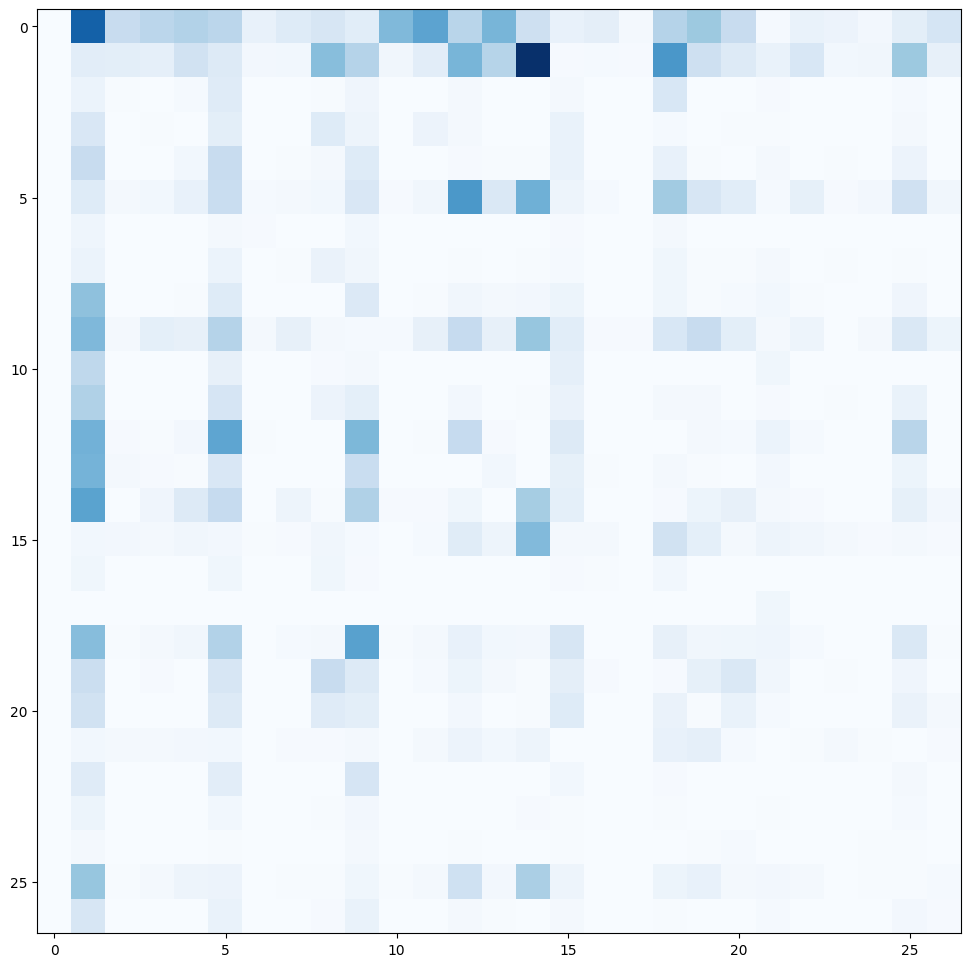

In [54]:
plt.figure(figsize=(12,12))
plt.imshow(count_matrix,cmap='Blues');

In [27]:
p_matrix = count_matrix / count_matrix.sum(1, keepdims=True)
p_matrix[0].sum()

tensor(1.0000)